In [101]:
import cv2
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import random
import time 
import numpy as np
import skimage

from PIL import Image,ImageDraw,ImageFont,ImageEnhance,ImageFilter
%matplotlib inline

origin_images = glob.glob('./blank_region/*.jpg')
font = ImageFont.truetype('./font/Songti.ttc',20,index=6)
# font = ['./font/华文细黑.ttf','./font/Songti.ttc','./font/STHeitiLight.ttc']
save_dir = '../data/train_num_no_char_v2/'
font_dir = ['./font/STHeitiLight.ttc','./font/Songti.ttc','./font/Hiragino Sans GB.ttc']


In [70]:
font_dir = ['./font/Songti.ttc','./font/华文细黑.ttf']
# font_dir = ['./font/华文细黑.ttf']

def SaltAndPepper(src,percetage):  
    SP_NoiseImg=src 
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1]) 
    for i in range(SP_NoiseNum): 
        randX=np.random.randint(0,src.shape[0]-1) 
        randY=np.random.randint(0,src.shape[1]-1) 
        if np.random.randint(0,1)==0: 
            SP_NoiseImg[randX,randY]=0 
        else: 
            SP_NoiseImg[randX,randY]=255 
    return SP_NoiseImg

def image_enhance(img):
    
    flag1 = random.random()
    if flag1 > 0.3:
        img = ImageEnhance.Contrast(img).enhance(random.random()/2+0.8)
        img = ImageEnhance.Brightness(img).enhance(random.random()/1.5+0.75)
        flag2 = random.random()
        if flag2 > 0.5:
            for _ in range(random.randint(0,4)):
                img = ImageEnhance.Sharpness(img).enhance(0.01)
#                 print('sharp one')
        elif flag2 > 0.3:
            for _ in range(random.randint(0,3)):
                img = img.filter(ImageFilter.SMOOTH_MORE)
#                 print('smooth one')
    return img



def gen_text_randomSize(item):
    fontName= random.choice(font_dir)
    fontSize= random.randint(18,21)
    len_item = len(item.strip())
    origin_images = glob.glob('./blank_region/*.jpg')
    if fontName == './font/Songti.ttc':
        index = 6
    else:
        index = 0
#     print(fontName,fontSize)
    font = ImageFont.truetype(font=fontName,size=fontSize,index=index)
    img = cv2.imread(random.choice(origin_images))
    image = img.copy()
    h,w = img.shape[:2]
    blank = random.choice([2,2,2,2,2,25,50])
    text_h,text_w = random.randint(fontSize,fontSize+7),(fontSize-5)*len_item+1+blank
    if random.random() > 0.7:
        text_h,text_w = random.randint(fontSize+3,fontSize+7),(fontSize-5)*len_item+1+blank
    h_chop = h-text_h
    w_chop = w-text_w
#     print(h,w,text_h,text_w,blank)
    x = np.random.randint(w_chop)
    y = np.random.randint(h_chop)
    image = image[y:y+text_h,x:x+text_w]

    flag = random.random()
    if flag >0.7:
        image = skimage.util.random_noise(image,mode='gaussian',var=0.002)
        image = np.uint8(image*255)
    

#     print(image.shape)
    img_PIL = Image.fromarray(image[:,:,::-1])
    draw = ImageDraw.Draw(img_PIL)
    draw.text((blank,-0.5),item,font=font,fill=(0,0,0))
    
    img_PIL = image_enhance(img_PIL)
    
    with open(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.txt', "w", encoding='utf-8') as f:
        f.write(item)
    img_PIL.save(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.png') 
    return img_PIL

In [16]:
num_dict = ' 0123456789,./%-￥'

def gen_number_with_dot():
    serial_len = random.randint(0,5)
    num = random.random() * 10**serial_len if random.random() > 0.5 else random.randint(1,10**serial_len)
    num =  num if random.random() > 0.5 else round(random.random(),random.randint(1,2)) 
    reserve_list = [ '{:,.1f}', '{:,.2f}', '{:,.3f}']
    serial = random.choice(reserve_list).format(num)
    return serial

def gen_number_only():
    serial_len = random.randint(0,5)
    num = random.randint(1,10**serial_len)
    return '{:,}'.format(num)

def gen_serial_num():
    serial_len = random.randint(5,10)
    serial_begin = random.sample(num_dict[:61],1)
    serial = random.sample(num_dict[1:62],serial_len-1)
    return ''.join(serial_begin+serial)

def gen_money_with_dollar_sign():
    serial = gen_number_with_dot()
    serial_begin = num_dict[16]+' '
    return serial_begin+serial 

def gen_number_with_percent_sign():
    num = random.random() if random.random() > 0.5 else round(random.random(),2)
    reserve_list = ['{:.1%}','{:.2%}','{:.3%}']
    serial = random.choice(reserve_list).format(num)
    return serial


def gen_money_with_Chinese():
    serial = gen_number_with_dot()
    Chinese_list = ["合 计 " + serial, serial+" 元",'总 额 '+serial, '单 价 '+serial]
    return random.choice(Chinese_list)

In [102]:
list_len = 2000
# serial_num = [gen_serial_num() for _ in range(list_len)]
number_only = [gen_number_only() for _ in range(list_len)]
number_with_dot = [gen_number_with_dot() for _ in range(list_len)]
money_with_dollar_sign = [gen_money_with_dollar_sign()  for _ in range(list_len)]
money_with_percent_sign = [gen_number_with_percent_sign()  for _ in range(list_len)]
random_char = [''.join(random.sample(num_dict,10)) for _ in range(list_len)]

total_num = number_with_dot + number_only + random_char + \
            money_with_dollar_sign+money_with_percent_sign
random.shuffle(total_num)
len(total_num)

10000

In [14]:
print(number_with_dot[:10])
print(random_char[:10])
print(number_only[:10])
print(number_with_dot[:10])
print(money_with_dollar_sign[:10])
print(money_with_percent_sign[:10])



['0.6', '914.0', '0.4', '0.49', '0.1', '0.10', '0.3', '0.8', '78,395.0', '7.496']
[',￥715/- .2', '15/63.7￥, ', '.1 -7%4,9/', '29.￥/5%167', '4620, 5%/8', '.,45-92 /6', '-41,0785%.', '9-7015/%8￥', '08 19/,-4￥', '61-%,.5927']
['50', '97,382', '1', '1', '42,183', '44,689', '1', '1', '2,544', '22,442']
['0.6', '914.0', '0.4', '0.49', '0.1', '0.10', '0.3', '0.8', '78,395.0', '7.496']
['￥ 5.090', '￥ 0.30', '￥ 0.9', '￥ 0.970', '￥ 709.00', '￥ 51,935.8', '￥ 0.860', '￥ 9,867.4', '￥ 1.00', '￥ 0.920']
['25.2%', '94.822%', '43.8%', '27.00%', '82.0%', '53.0%', '64.162%', '94.000%', '97.00%', '78.00%']


'9,495'

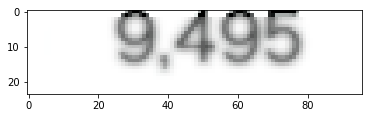

In [99]:

# random_char = [''.join(random.sample(num_dict,10)) for _ in range(list_len)]
item = random.choice(total_num)
result = gen_text_randomSize(item)
plt.imshow(result)
item

In [103]:
from multiprocessing import Pool,cpu_count
pool = Pool(cpu_count()//4)
start = time.time()
%time result = pool.map(gen_text_randomSize,total_num)
end = time.time()
print(end-start,cpu_count()//4)



CPU times: user 1.17 s, sys: 786 ms, total: 1.96 s
Wall time: 4min 38s
278.5549600124359 8


In [ ]:
money_with_dot + serial_num + serial_num+number_with_dot+ \
            money_with_dollar_sign+money_with_percent_sign
len(set(money_with_percent_sign))


In [ ]:
number_with_dot = [gen_number_with_dot() for _ in range(30000)]
len(set(number_with_dot))

In [ ]:
number_with_dot